# Homework \#1 (4 points)
Due June 24 @ 11:59pm

## Submission requirements
Upload a **single PDF file** of your IJulia notebook for this entire assigment. Clearly denote which question each section of your PDF corresponds to.

## Problem 1 - Getting Started with Julia/JuMP (1 point)

Model the following problem in JuMP:

$\begin{align*}
\min & \ 0.5x_1 - 7x_2 + (1/3)x_3\\
\text{s.t.} &\  x_4  = 5\\
& x_1 + x_2 - 2x_3 + 0.5x_4 \geq 10\\
& -x_1 + 3x_2 \leq -2\\
& x_1, x_3 \geq 0, x_2  \leq 0
\end{align*}$

Solve this problem using Clp, ECOS, and SCS solvers.  Compare the answers found by each solver by answering the following:  
* Which solver is most accurate?  
* Which is fastest (use the @time macro)? (Note: you should run each solver several times to get an average time.)
    * Can you speculate as to why? 
* If there is no clear difference between the solvers, can you think of some factors that might contribute to solver speed differences? 


#### <font color='red'> Problem 1 Answer</font>

On the first call (@time) the function gets compiled.  You should not take the results of this run seriously. (https://docs.julialang.org/en/latest/manual/performance-tips/)

Using each solver 10 times, it was obtained the time table in mili seconds:

|n|Clp|ECOS|SCS|
|-----|-----|-----|-----|
|1|1.372|1.826|2.331|
|2|1.314|1.837|2.549|
|3|1.319|1.957|2.571|
|4|1.402|1.848|2.286|
|5|1.299|2.045|2.529|
|6|1.354|2.245|2.204|
|7|1.329|1.823|2.119|
|8|1.212|1.929|2.289|
|9|1.531|1.852|2.043|
|10|1.477|2.003|2.064|
|Avg|1.3609|1.9365|2.2985|

The values obtained for the optimization was (ECOS and SCS were rounded):

|Solver|$f_{obj}$|$X_1$|$X_2$|$X_3$|$X_4$|
|-----|-----|-----|-----|-----|-----|
|Clp|3.75|7.5|0.0|0.0|5.0|
|ECOS|3.75|7.5|0.0|0.0|5.0|
|SCS|3.75|7.5|0.0|0.0|5.0|

- Since Clp was the model that brought answers that was not rounded, it was the most accurate. <font color='red'> Clp was the most accurate</font>

- Looking at the running time table for each solver we can see that the <font color='red'> Clp was the fastest solver for this optimization problem</font>

    - The reason

#### Problem 1 Code

In [1]:
using JuMP, Clp, ECOS, SCS

m = Model(Clp.Optimizer)
# m = Model(ECOS.Optimizer)
# m = Model(ECOS.Optimizer)

MOI.set(m, MOI.Silent(), true);

@variable(m, X1 >=0)
@variable(m, X2 <=0)
@variable(m, X3 >=0)
@variable(m, X4 ==5)

@objective(m, Min, 0.5*X1-7*X2+(1/3)*X3)

#@constraint(m,c1,X4==5)
@constraint(m,c2,X1+X2-2*X3+0.5*5>=10)
@constraint(m,c3,-X1+3*X2<=-2)

# print(m)
;

In [2]:
@time(JuMP.optimize!(m))

 13.674810 seconds (48.56 M allocations: 2.393 GiB, 8.13% gc time)


In [3]:
JuMP.optimize!(m)

obj_value = JuMP.objective_value(m)
X1 = JuMP.value(X1)
X2 = JuMP.value(X2)
X3 = JuMP.value(X3)
X4 = JuMP.value(X4)
;

In [4]:
print(obj_value,"\n",X1,"\n",X2,"\n",X3,"\n",X4)

3.75
7.5
0.0
0.0
5.0

## Problem 2 - DnD (Decision Variables and Drawing) (1 point)

Prof. Smith is rolling up a new character for her optimization-based role-playing campaign and she wants to use linear programming to help make some important decisions. She is playing a 4th-level Dragonborn and is trying to decide how many pounds of iron and steel she wants to use to build a sword. Every pound of steel adds a "slowness" factor of 1, whereas every pound of iron adds a "slowness" factor of -3 (reduces slowness by 3). She would like to combine iron and steel to meet the requirements given below while minimizing the total "slowness" of her character. 

The table below summarizes several characteristics of each pound of iron and steel. 

|Material | Damage (per pound) |Protection (per pound)| Surface area/pound|
|--------:|---------------:|---------------:|---------:|
|Iron|-1 points|2 points|1 $m^2$|
|Steel|1 points|1 point|2 $m^2$|

Prof. Smith wants to ensure that her total damage is at least -2 points and her total protection is at least 6 points. Furthermore, her character can carry a sword with a maximum surface area of 8 $m^2$.

(a)  Formulate a linear program to help Prof. Smith figure out how many pounds of each type of material (iron and steel) she should purchase to minimize her character's "slowness." State the math model, then code and solve the model using Julia.

(b)  Code the same model once again, this time separating the parameters from the solution as we did in class (see Top Brass examples).  Confirm that you obtain the same solution as in part (a).  

(c)  Solve  the  problem  graphically  by  plotting  the  feasible  set  and  at least two isoprofit lines for  the  objective function.  Confirm that you obtain the same solution as in the previous parts.


#### <font color='red'> Problem 2 Solution</font>

(a)

- Mathematical Model

    - Decision Variables:
        - Pounds of Iron ($W_I \geq 0$)
        - Pounds of Steel ($W_S \geq 0$)
    - Objective function:
        - $ \min W_S + 3W_I$
    - Constraints:
        - $C_1$: $W_S - W_I \geq -2$
        - $C_2$: $W_S +2W_I \geq 6$
        - $C_3$: $2W_S+W_I \leq 8$

- Code

In [33]:
using JuMP, Clp

m = Model(Clp.Optimizer)

MOI.set(m, MOI.Silent(), true);

@variable(m, Wi >=0)
@variable(m, Ws >=0)

@objective(m, Min, Ws - 3*Wi)

@constraint(m,c1, Ws-Wi >= -2)
@constraint(m,c2, Ws+2*Wi >= 6)
@constraint(m,c3, 2*Ws+Wi <= 8)

# print(m)

@time(JuMP.optimize!(m))

obj_value = JuMP.objective_value(m)
Wi = JuMP.value(Wi)
Ws = JuMP.value(Ws)

println("\n---------------\n","f : ",obj_value,"\nWi: ",Wi,"\nWs: ",Ws,"\n---------------\n")
;

  0.001326 seconds (1.71 k allocations: 119.188 KiB)

---------------
f : -10.0
Wi: 4.0
Ws: 2.0
---------------



(b) **Solving in modules**

In [35]:
using JuMP, Clp

m = Model(Clp.Optimizer)
MOI.set(m, MOI.Silent(), true);

material_types = [:iron, :steel]

slow = Dict(:iron => -3, :steel => 1)
damage = Dict(:iron => -1, :steel => 1)
defence = Dict(:iron => 2, :steel => 1)
surface = Dict(:iron => 1, :steel => 2)

min_dam = -2
min_def = 6
max_sur = 8

@variable(m, material[material_types] >= 0)

@expression(m, tot_slo, sum(material[i] * slow[i] for i in material_types))
@expression(m, tot_dam, sum(material[i] * damage[i] for i in material_types))
@expression(m, tot_def, sum(material[i] * defence[i] for i in material_types))
@expression(m, tot_sur, sum(material[i] * surface[i] for i in material_types))

@objective(m, Min, tot_slo)

@constraint(m, c1, tot_dam >= min_dam)
@constraint(m, c2, tot_def >= min_def)
@constraint(m, c3, tot_sur <= max_sur)

optimize!(m)

println("\nSlowness: ", value(tot_slo),"\n")

println("Damage: ", value(tot_dam))
println("Defense: ", value(tot_def))
println("Surface: ", value(tot_sur),"\n")

for i in material_types
    println(i,": ", value(material[i]))
end


Slowness: -10.0

Damage: -2.0
Defense: 10.0
Surface: 8.0

iron: 4.0
steel: 2.0


(c) **Solving graphically**

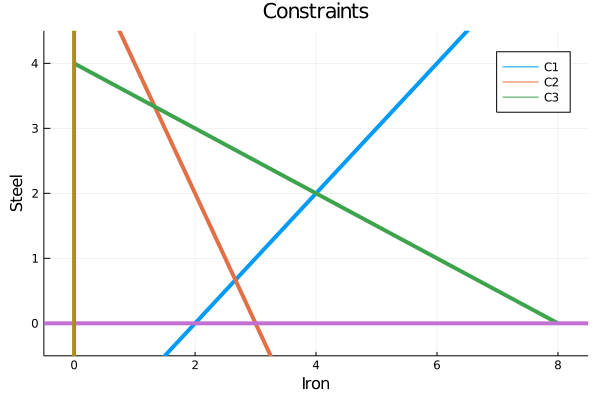

In [70]:
using Plots

Wi = range(0,8,step=0.01)

labels = ["C1" "C2" "C3"]

c1 = Wi .- 2
c2 = (6 .- (2*Wi))
c3 = (8 .- Wi)./2
c4 = 0*(range(-0.5,8.5,step=0.01))

#plot(Shape([(0,0),(0,100/3),(20,20),(30,0)]), line = 0, leg = false, fillcolor = plot_color(:yellow, 0.3))
plot(Wi,[c1,c2,c3],label=labels,line=4)
plot!((range(-0.5,8.5,step=0.01)),[c4],label="",line=4)
plot!([0], seriestype="vline",label="",line=4)
plot!(xlabel="Iron",ylabel="Steel",xlims=(-0.5,8.5),ylims=(-0.5,4.5))
plot!(title="Constraints")

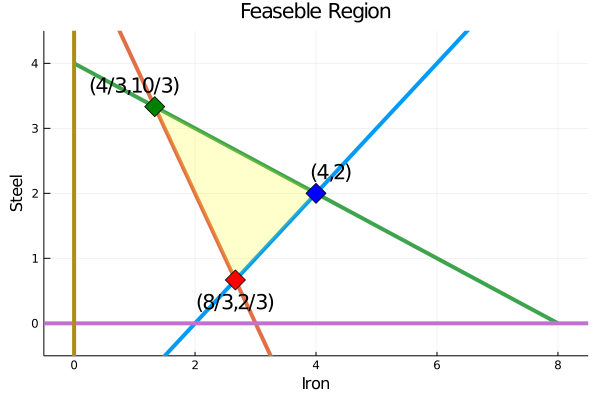

In [71]:
plot!(Shape([(8/3,2/3),(4,2),(4/3,10/3)]), line = 0, leg = false,label = "", fillcolor = plot_color(:yellow, 0.2))
plot!([8/3],[2/3],marker=:d,markersize = 10,color=:red)
annotate!(8/3,1/3,"(8/3,2/3)")
plot!([4],[2],marker=:d,markersize = 10,color=:blue)
annotate!(4+1/4,2+1/3,"(4,2)")
plot!([4/3],[10/3],marker=:d,markersize = 10,color=:green)
annotate!(4/3-1/3,10/3+1/3,"(4/3,10/3)")
plot!(title="Feaseble Region")

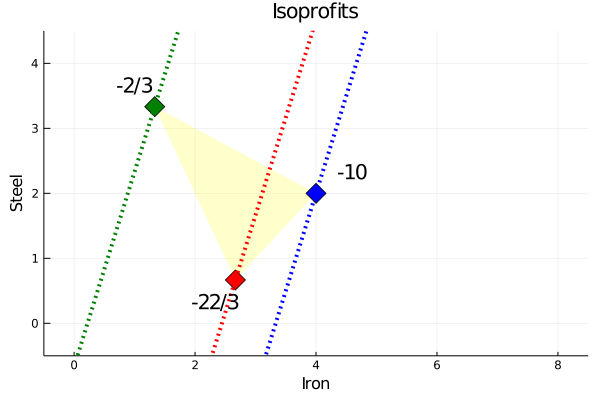

In [73]:
plot(Shape([(8/3,2/3),(4,2),(4/3,10/3)]), line = 0, leg = false,label = "", fillcolor = plot_color(:yellow, 0.2))
plot!([8/3],[2/3],marker=:d,markersize = 10,color=:red)
annotate!(7/3,1/3,"-22/3")
plot!(Wi,(-22/3 .+ (3*Wi)),line = 4,linestyle=:dot,color=:red)
plot!([4],[2],marker=:d,markersize = 10,color=:blue)
annotate!(4+3/5,2+1/3,"-10")
plot!(Wi,(-10 .+ (3*Wi)),line = 4,linestyle=:dot,color=:blue)
plot!([4/3],[10/3],marker=:d,markersize = 10,color=:green)
annotate!(4/3-1/3,10/3+1/3,"-2/3")
plot!(Wi,(-2/3 .+ (3*Wi)),line = 4,linestyle=:dot,color=:green)
plot!(xlabel="Iron",ylabel="Steel",xlims=(-0.5,8.5),ylims=(-0.5,4.5))
plot!(title="Isoprofits")

Therefore, the minimum value of the objective function is $-10$ and occurs when $W_I=4$ and $W_S = 2$

## Problem 3 - Standard Form (1 point)

Consider the following LP:

$\begin{align*}
\min & \ (1/2)x_1 - 7x_2 + (1/3)x_3\\
\text{s.t.} &\  x_4  = 5\\
& x_1 + x_2 - 2x_3 + 0.5x_4 \geq 10\\
& -x_1 + 3x_2 \leq -2\\
& x_1, x_3 \geq 0, x_2  \leq 0
\end{align*}$


(a) Convert the problem to standard form.

(b) What are $A$, $b$, $c$,and $x$?  Be sure to explain how the decision variables of your transformed LP relate to those of the original LP. 

(c) Solve the standard-form LP in Julia and report the objective value and the value of each decision variable in an optimal solution to the original LP. 

#### <font color="red">Problem 3 Solution</font>

(a)

To transform to the standard form all variables are bounded below by 0 and are unbounded above. This way, $x_2$ and $x_4$ are variables that are not in standard form.

- We invert the $x_2$ constraint by replacing it with $x_2 = -y,\ y\geq0$:

<p style="text-align: center;">
$
\begin{align*}
\min & \ (1/2)x_1 + 7y + (1/3)x_3\\
\text{s.t.} &\  x_4  = 5\\
& x_1 - y - 2x_3 + 0.5x_4 \geq 10\\
& -x_1 - 3y \leq -2\\
& x_1, y, x_3 \geq 0
\end{align*}$
</p>

- We bound $x_4$ by replacing it with $x_4 = u-v, \ u,v\geq0$:

<p style="text-align: center;">
$
\begin{align*}
\min & \ (1/2)x_1 + 7y + (1/3)x_3\\
\text{s.t.} &\  u-v  = 5\\
& x_1 - y - 2x_3 + 0.5u - 0.5v \geq 10\\
& -x_1 - 3y \leq -2\\
& x_1, y, x_3,u,v \geq 0
\end{align*}$
</p>

- Changing the equal sign of the first constraint to a pair of inequalities

<p style="text-align: center;">
$
\begin{align*}
\min & \ (1/2)x_1 + 7y + (1/3)x_3\\
\text{s.t.} &\  u-v \leq 5\\
&\  u-v \geq 5\\
& x_1 - y - 2x_3 + 0.5u - 0.5v \geq 10\\
& -x_1 - 3y \leq -2\\
& x_1, y, x_3,u,v \geq 0
\end{align*}$
</p>

- Multiplying each of the constraints that contains "$\geq$" symbol by $-1$:

<p style="text-align: center;">
$
\begin{align*}
\min & \ (1/2)x_1 + 7y + (1/3)x_3\\
\text{s.t.} &\  u-v \leq 5\\
&\  -u+v \leq -5\\
& -x_1 + y + 2x_3 - 0.5u + 0.5v \leq -10\\
& -x_1 - 3y \leq -2\\
& x_1, y, x_3,u,v \geq 0
\end{align*}$
</p>

- To convert the be a maximization problem, we multiply the objective function by $-1$:

<p style="text-align: center;">
$
\begin{align*}
\max & \ -(1/2)x_1 - 7y - (1/3)x_3\\
\text{s.t.} &\  u-v \leq 5\\
&\  -u+v \leq -5\\
& -x_1 + y + 2x_3 - 0.5u + 0.5v \leq -10\\
& -x_1 - 3y \leq -2\\
& x_1, y, x_3,u,v \geq 0
\end{align*}$
</p>

(b)

Putting the optimization in the form of

<p style="text-align: center;">
$\begin{align}
\underset{x}{\max} \ & c^Tx & \\
\text{s.t.} \ & Ax \leq b &\\
& x \geq 0 &
\end{align}$
</p>

We have that:

<p style="text-align: center;">
$\begin{align*}
A&=
\begin{pmatrix}
0 & 0 & 0 & 1 & -1\\
0 & 0 & 0 & -1 & 1\\
-1&1&2&-0.5&-0.5\\
-1&-3&0&0&0
\end{pmatrix}\\
b&=
\begin{pmatrix}
5\\-1\\10\\-2
\end{pmatrix}\\
c&=
\begin{pmatrix}
-1/2\\-7\\-1/3\\0\\0
\end{pmatrix}\\
x&=\begin{pmatrix}
x_1\\y\\x_3\\u\\v
\end{pmatrix}
\end{align*}
$
</p>


Where the original variables $x_{orig}$ are

<p style="text-align: center;">
$x_{orig}=
\begin{pmatrix}
x_1\\x_2\\x_3\\x_4
\end{pmatrix}=
\begin{pmatrix}
1&0&0&0&0\\
0&-1&0&0&0\\
0&0&1&0&0\\
0&0&0&1&-1
\end{pmatrix}
\begin{pmatrix}
x_1\\y\\x_3\\u\\v
\end{pmatrix}$
</p>

(c) Julia Code (adapted from the Standard Form notebook)

In [9]:
using JuMP, Clp

m = Model(Clp.Optimizer)
MOI.set(m, MOI.Silent(), true);

# three nonnegative variables
@variable(m, x1 >= 0 )
@variable(m, y >= 0 )
@variable(m, x3 >= 0 )
@variable(m, u >= 0 )
@variable(m, v >= 0 )

# four less than or equal to constraints
@constraint(m, u - v <= 5 )
@constraint(m, -u + v <= -5 )
@constraint(m, -x1 + y + 2*x3 -0.5*u + 0.5*v <= -10 )
@constraint(m, -x1 - 3*y <= -2 )

# maximize the objective
@objective(m, Max, -(1/2)*x1 -7*y -(1/3)*x3 )

# solve the standard form model
optimize!(m)

# display the model and solution
# println(m)
# println()
# remember to convert back to x1 and x2!
println("x1 = ", value(x1) )
println("x2 = ", value(-y) )
println("x3 = ", value(x3) )
println("x4 = ", value(u-v) )
# remember min f(x) = -max -f(x), so we need to report the negative of our objective value
println("objective = ", -objective_value(m) )

x1 = 7.5
x2 = 0.0
x3 = 0.0
x4 = 5.0
objective = 3.75


## Problem 4 - This problem is b-ORE-ing (1 point)


A mining company creatively named "MineCo" is trying to determine their daily mining plan. There are forty different locations within the mine where ore can be extracted, and at each of the forty locations the ore has slightly different percentages of 7 "quality attributes." MineCo has to monitor each of these 7 attributes of the ore they sell. Assume all ore that is extracted is taken to a processing center where it is perfectly blended before it is sent to the buyers, and quality is measured after the ore is blended. MineCo can extract up to 1000 total tons today.

The ore extracted from each site also has differing total quality, which means each location can be mined to produce different value (in \$) per ton extracted.

The full data on each mining location is provided in "mineco.csv" on Canvas.The data has the following structure, where each row shows a different mining site and each column shows the relevant ore characteristics. You can use the code snippet provided below to read the .csv file and load it into Julia, or you can read/load the data in any way you choose.


|Site | Value/ton (\$) | % Gold |% Carbon| % Iron|$\dotsm$ |
|--------:|---------------:|---------------:|---------:|---------:|---------:|
| Minimum % | |3 |2 |4| $\dotsm$|
| Maximum % | |11 |9 |15| $\dotsm$|
|1| 2349| 6| 16|16 |  $\dotsm$|
|2| 2397|10 |12 |1 | $\dotsm$ |
|$\vdots$|$\vdots$ |$\vdots$ |$\vdots$ |$\vdots$ |$\ddots$ |



(a) Formulate a __linear__ program that MineCo can use to determine 
how many tons of ore to extract from each site today in order to maximize their total value. Give a general form (no numbers) of the math model.

(b) Implement and solve this instance of the model in Julia/JuMP.  Display the optimal objective value and the optimal mining plan (in tons extracted from each site). 


#### <font color="red"> Problem 4 Solution</font>

(a) Given the set of sites $S=\{1,\cdots,40\}$, for each site $i \in S$ we have an desired amount of tons of ore to be extracted, $ts_i$ (ton), and have an value of $V_i$ (\\$ /ton). 

For each site, we have 7 atributes given by the set $A = \{\text{Gold (%)},\text{Carbon (%)},  \text{Iron (%)}, \text{Copper (%)}, \text{Silver (%)},\text{Coal (%)}, \text{Silica (%)}\}$ and their values can be represented as $a_{i,j}$, where $i \in S$ and $j \in A$. The minimum and maximum desired values of each of the attributes are represented by $m_j$ and $M_j$, $j\in A$, respectively. The total of ore to be extracted is given by $T$.

- Decision Variables:
    - $ts_i$: tons of ore to be extracted from site $i$
- Objective function:
    - $\max \sum_{i \in S} ts_i \cdot V_i$
- Constraints:
    - $Ctot$ : $\sum_{i\in S} ts_i \leq T$
    - $Cmin_j$: $\sum_{i\in S} a_{i,j}\cdot ts_i \geq m_j$, for $j\in A$
    - $Cmax_j$: $\sum_{i\in S} a_{i,j}\cdot ts_i \leq M_j$, for $j\in A$
    
(b) Julia implementation:

In [10]:
#You might need to run "Pkg.add(...)" before using these packages
using DataFrames, CSV, NamedArrays

#Load the data file
raw = CSV.read("mineco.csv");

# turn DataFrame into an array
mine_array = convert(Array,raw);

# the names of the DataFrame (header) are the attributes
attributes = names(raw[3:end]);

# create a list of mining sites from the mine array
sites = mine_array[3:end,1];

# create a dictionary of the value of each mining site's ore (per ton)
ore_val = Dict(zip(sites,mine_array[3:end,2]));

# create a dictionary of the value of min and max % of each attribute
min_percent = Dict(zip(attributes,mine_array[1,3:end]));
max_percent = Dict(zip(attributes,mine_array[2,3:end]));

# create a NamedArray that specifies the % of each attribute at each site
using NamedArrays
mine_attribute_matrix = mine_array[3:end,3:end]

# rows are sites, columns are attributes
mine_attribute_array = NamedArray(mine_attribute_matrix, (sites, attributes), ("sites","attributes"))

# note this syntax uses some deprecated commands, so you'll get a warning message when you run it
# the code should still work (you can ignore the warning)

┌ Warning: `lastindex(df::AbstractDataFrame)` is deprecated, use `ncol(df)` instead.
│   caller = top-level scope at In[10]:9
└ @ Core In[10]:9
┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[10]:9
└ @ Core In[10]:9


40×7 Named Array{Any,2}
sites ╲ attributes │   Gold (%)  Carbon (%)  …    Coal (%)  Silica (%)
───────────────────┼──────────────────────────────────────────────────
1                  │          6          16  …           7          12
2                  │         10          12              8          10
3                  │          4           9             19          19
4                  │         20           8              8          16
5                  │         14           9              8           8
6                  │         11           5             11          19
7                  │          3          14             17          10
8                  │         18           2             15          11
9                  │          7          13             10          11
10                 │         17          18              6          19
11                 │          8          13             18          15
12                 │          2          19          

In [49]:
using JuMP, Clp,Printf

m = Model(Clp.Optimizer)
MOI.set(m, MOI.Silent(), true);

@variable(m, ts[sites] >= 0)

@expression(m, tot_profit, sum(ore_val[i] * ts[i] for i in sites) )
@expression(m, tot_tons, sum(ts[i] for i in sites))

@constraint(m, constrmax[i in attributes], sum(mine_attribute_array[s,i]*ts[s] for s in sites) <= max_percent[i]*tot_tons)
@constraint(m, constrmin[i in attributes], sum(mine_attribute_array[s,i]*ts[s] for s in sites) >= min_percent[i]*tot_tons)
@constraint(m, consttottons, tot_tons<=1000)

@objective(m, Max, tot_profit)

optimize!(m)

println()
# println(value(tot_tons))
@printf("Objective Function: \$%.2f \n",value(tot_profit))
;


Objective Function: $2371331.82 


In [79]:
println("Extraction plan:")
for s in sites
    if value(ts[s])!=0
        print("\t Site ",s,":")
        @printf("%.4f\tton\n",value(ts[s]))
    end
end

Extraction plan:
	 Site 14:417.7697	ton
	 Site 17:52.1482	ton
	 Site 20:173.1300	ton
	 Site 34:181.1711	ton
	 Site 35:114.7687	ton
	 Site 40:61.0123	ton
